<img src="Hackathon.jpg" alt="Emmanuel" width="800px">
<img src="EmmanuelProfile.png" alt="Emmanuel" width="600px">

# Predicting  who in Africa is most likely to have a bank account?

## Description




Financial inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 14% of adults) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and make payments while also helping businesses build up their credit-worthiness and improve their access to loans, insurance, and related services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The objective of this notebook is to create a machine learning model to predict which individuals are most likely to have or use a bank account. This model developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

## Getting Started

### Installing Required Packages

In [1]:
# pip install seaborn
# pip install lightgbm
# pip install xgboost

### Loading Packages

In [2]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [3]:
# Load files into a pandas dataframe
trainData = pd.read_csv('Train.csv')
testData = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('VariableDefinitions.csv')

###  Exploratory Analysis


* Checking the Shape

In [4]:
# Let’s observe the shape of our datasets.
print('train data shape :', trainData.shape)
print('test data shape :', testData.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


* Checking the fist five rows of Test and Train Data

In [5]:
trainData.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


* Check for Missing Values

In [6]:
print('missing values:', trainData.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


* Explore target distribution

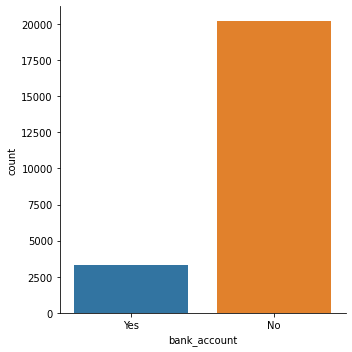

In [7]:

sns.catplot(x="bank_account", kind="count", data=trainData)

### ` Submission File`

In [8]:
# view the submission file
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


### ` Test Data`

In [9]:
testData.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


### ` Variables Data`

In [10]:
# Let's view the variables
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


### Data Preprocessing
* Convert target label to numerical Data


In [11]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()
trainData['bank_account'] = le.fit_transform(trainData['bank_account'])

* Separate training features from target

In [38]:
#Separate training features from target
trainFeatures = trainData.drop(['bank_account'], axis=1)
trainLabels = trainData['bank_account']

trainLabels

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32

### Data Engineering

In [65]:
# function to preprocess our data from train models
def preprocessing_data(data):
    data = data.drop(["country"], axis=1)
    data = data.drop(["year"], axis=1)
    data = data.drop(["uniqueid"], axis=1)
    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             ]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    

   
    
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data

In [51]:
# preprocess the train data 
processed_train = preprocessing_data(trainFeatures)
processed_test = preprocessing_data(testData)

In [52]:
# shape of the processed train set
print(processed_train.shape)

(23524, 32)


In [53]:
processed_test.shape

(10086, 32)

### Model Building

In [54]:
import sklearn.model_selection

In [55]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(processed_train, trainLabels, stratify = trainLabels, 
                                                  test_size = 0.3, random_state=42)

In [69]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(bootstrap= True,
 max_depth = 70,
 max_features= 'auto',
 min_samples_leaf= 4,
 min_samples_split= 10,
 n_estimators =400)

In [70]:
#fitting the models
clf.fit(processed_train,trainLabels)

RandomForestClassifier(max_depth=70, max_features='auto', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=400)

### Model Evaliation
* Error rate


* Confusion matrix


### Prediction on the Test Data

In [71]:
# Get the predicted result for the test Data
testData.bank_account = clf.predict(processed_test)

### Creating Submission File

In [72]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": testData["uniqueid"] + " x " + testData["country"],
                           "bank_account": testData.bank_account})

In [73]:
#show the five sample
submission.sample(5)


,uniqueid,bank_account
6053,uniqueid_12188 x Rwanda,0
4816,uniqueid_10951 x Rwanda,0
5911,uniqueid_12046 x Rwanda,0
9023,uniqueid_9298 x Tanzania,0
2254,uniqueid_8323 x Kenya,0


In [75]:
# Create submission csv file csv file
submission.to_csv('submission6.csv', index = False)



<img src="EmmanuelFooter.png" alt="Emmanuel" width="400px">